In [24]:
import pyfolio as pf
# This is a sample Python script.
from datetime import datetime
import time

# from src.pairs.pairs_strategy import TradingPair
import yfinance as yf

from src.pairs.pair_strategy import PairStrategy
from src.pairs.coint_functions import *

from src.pairs.portfolio import Portfolio


from src.util.DataFetcher import *

import pandas as pd
import statsmodels.api as sm

from statsmodels.tools.tools import add_constant

import numpy as np


import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

# Load your data
# For this example, assume 'data' is a DataFrame with two columns: 'asset1' and 'asset2'
# data = pd.read_csv('path_to_your_data.csv')


# Backtest and risk management code would go here


In [3]:
pip install pykalman


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
# tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "META", "BRK-B", "MSFT", "QQQ"]
tickers = ["BTC-USD", "ETH-USD"]
# tickers = ["MSFT", "QQQ"]

start_date = datetime(2017, 1, 1)
end_date = datetime(2024, 1, 27)
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)

tickData


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,BTC-USD,ETH-USD
Date,,
2017-01-01,998.325012,NaN
2017-01-02,1021.750000,NaN
2017-01-03,1043.839966,NaN
2017-01-04,1154.729980,NaN
2017-01-05,1013.380005,NaN
...,...,...
2024-01-09,46139.730469,2344.827148
2024-01-10,46627.777344,2582.103516
2024-01-11,46368.585938,2619.619141


In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

# Function to calculate the hedge ratio using linear regression
def calculate_hedge_ratio(asset1, asset2):
    model = OLS(asset1, sm.add_constant(asset2)).fit()
    return model.params[1]

# Function to generate trading signals
# def generate_signals(spread):
#     entry_threshold = spread.mean() + 0.5 * spread.std()
#     exit_threshold = spread.mean()
#     signals = np.where(spread > entry_threshold, 'short', np.nan)  # Short the spread
#     signals = np.where(spread < exit_threshold, 'long', signals)   # Long the spread
#     signals = np.where(np.isnan(signals), 'exit', signals)
#     return signals

def generate_signals(spread):
    entry_threshold = spread.mean() + 0.5 * spread.std()
    exit_threshold = spread.mean()

    # Initialize signals as numeric values
    signals = np.full(spread.shape, np.nan)  # Use np.nan for initialization

    # Generate numeric signals
    signals[spread > entry_threshold] = -1  # Represent 'short' as -1
    signals[spread < exit_threshold] = 1    # Represent 'long' as 1
    signals[np.isnan(spread)] = 0            # Represent 'exit' as 0

    # Convert numeric signals to strings for readability
    string_signals = np.where(signals == -1, 'short', 
                              np.where(signals == 1, 'long', 'exit'))
    return string_signals        # Represent 'exit' as 0


data = tickData
pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],start_full='2018-01-05',end_full='2019-01-04',start_train='2018-01-05',end_train='2018-07-04', tau_denom=365)

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Calculate hedge ratio using linear regression
# hedge_ratio = calculate_hedge_ratio(pair.y_full, pair.x_full)

# # # Calculate the spread
# # spread = data['price_asset1'] - hedge_ratio * data['price_asset2']

# # # Generate signals
# # signals = generate_signals(spread)

# # Backtesting
# initial_capital = 100000.0
# # capital = initial_capital
# positions = {'BTC-USD': 0, 'ETH-USD': 0}
# portfolio_value = []

# for i in range(len(data)):
#     signal = signals[i]
#     if signal == 'long':
#         # Buy Asset 1, Sell Asset 2
#         quantity_asset1 = (capital / 2) / data['price_asset1'][i]
#         quantity_asset2 = quantity_asset1 * hedge_ratio
#         positions['BTC-USD'] += quantity_asset1
#         positions['ETH-USD'] -= quantity_asset2
#         capital -= quantity_asset1 * data['price_asset1'][i]
#         capital += quantity_asset2 * data['price_asset2'][i]

#     elif signal == 'short':
#         # Sell Asset 1, Buy Asset 2
#         quantity_asset1 = (capital / 2) / data['price_asset1'][i]
#         quantity_asset2 = quantity_asset1 * hedge_ratio
#         positions['BTC-USD'] -= quantity_asset1
#         positions['ETH-USD'] += quantity_asset2
#         capital += quantity_asset1 * data['price_asset1'][i]
#         capital -= quantity_asset2 * data['price_asset2'][i]

#     elif signal == 'exit':
#         # Close all positions
#         capital += positions['BTC-USD'] * data['price_asset1'][i]
#         capital += positions['ETH-USD'] * data['price_asset2'][i]
#         positions = {'BTC-USD': 0, 'ETH-USD': 0}

#     # Update portfolio value
#     current_value = capital + positions['BTC-USD'] * data['price_asset1'][i] + positions['ETH-USD'] * data['price_asset2'][i]
#     portfolio_value.append(current_value)

Pair Created (BTC-USD, ETH-USD)
[Train start (2018-01-05) End train (2018-07-04), Full start (2018-01-05) End full (2019-01-04)]


/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/pairs/pair_strategy.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.c = ols.params[0]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/pairs/pair_strategy.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.b = ols.params[1]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/pairs/coint_functions.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior

In [43]:
pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],start_full='2018-01-05',end_full='2019-01-04',start_train='2018-01-05',end_train='2018-07-04', tau_denom=365)
val = pair.run_strategy(z=1)

beta = pair.OLS_STATS_DICT['b']
Y = pair.y_full
X = pair.x_full

# signals = generate_signals(pair.res_calc)
signals = pair.results['position']

# Backtesting
initial_capital = 100000.0
capital = initial_capital
positions = {'BTC-USD': 0, 'ETH-USD': 0}
portfolio_value = []

for i in range(len(Y)):
    signal = signals[i]
    if signal == 1:
        # Buy Asset 1, Sell Asset 2
        quantity_asset1 = (capital / 2) / Y[i]
        quantity_asset2 = quantity_asset1 * beta
        positions['BTC-USD'] += quantity_asset1
        positions['ETH-USD'] -= quantity_asset2
        capital -= quantity_asset1 * Y[i]
        capital += quantity_asset2 * X[i]

    elif signal == -1:
        # Sell Asset 1, Buy Asset 2
        quantity_asset1 = (capital / 2) / Y[i]
        quantity_asset2 = quantity_asset1 * beta
        positions['BTC-USD'] -= quantity_asset1
        positions['ETH-USD'] += quantity_asset2
        capital += quantity_asset1 * Y[i]
        capital -= quantity_asset2 * X[i]

    elif signal == 0:
        # Close all positions
        capital += positions['BTC-USD'] * Y[i]
        capital += positions['ETH-USD'] * X[i]
        positions = {'BTC-USD': 0, 'ETH-USD': 0}

    # Update portfolio value
    current_value = capital + positions['BTC-USD'] * Y[i] + positions['ETH-USD'] * X[i]
    portfolio_value.append(current_value)   

Pair Created (BTC-USD, ETH-USD)
[Train start (2018-01-05) End train (2018-07-04), Full start (2018-01-05) End full (2019-01-04)]
0.04272034506583639
-0.04438425201505534
ab perf 0.4743246197275601


/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/pairs/pair_strategy.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.c = ols.params[0]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/pairs/pair_strategy.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.b = ols.params[1]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/pairs/coint_functions.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior

In [50]:
# portfolio_value
# positions

portfolio_df = pd.DataFrame(portfolio_value, columns=['portfolio_value'])
portfolio_df

total_return = (portfolio_df['portfolio_value'].iloc[-1] / initial_capital) - 1
cagr = ((portfolio_df['portfolio_value'].iloc[-1] / initial_capital) ** (1 / len(data))) - 1
volatility = portfolio_df['portfolio_value'].pct_change().std()
sharpe_ratio = (cagr / volatility) if volatility else np.nan

total_return
sharpe_ratio

0.0032749757460513265

In [36]:
signals = generate_signals(pair.res_calc)
len(signals)
len(pair.x_full)

365

Positions head:
 Date
2018-01-01   -1.0
2018-01-02   -1.0
2018-01-03   -1.0
2018-01-04   -1.0
2018-01-05   -1.0
Name: position, dtype: float64
Asset1 returns head:
 Date
2018-01-01         NaN
2018-01-02    0.144702
2018-01-03    0.088503
2018-01-04    0.018907
2018-01-05    0.017125
Name: ETH-USD, dtype: float64
Asset2 returns head:
 Date
2018-01-01         NaN
2018-01-02    0.097011
2018-01-03    0.014611
2018-01-04    0.026196
2018-01-05    0.117333
Name: BTC-USD, dtype: float64
Strategy returns head:
             2018-01-01 00:00:00  2018-01-02 00:00:00  2018-01-03 00:00:00  \
Date                                                                        
2018-01-01                  NaN                  NaN                  NaN   
2018-01-02                  NaN                  NaN                  NaN   
2018-01-03                  NaN                  NaN                  NaN   
2018-01-04                  NaN                  NaN                  NaN   
2018-01-05                 

<Axes: xlabel='Date'>

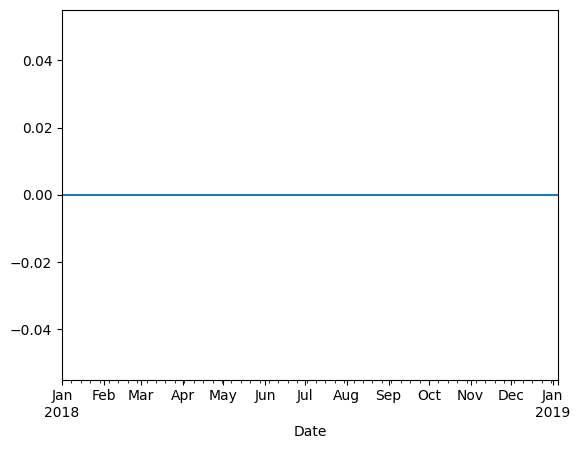

In [17]:
position = pair.results['position']

daily_returns = compute_strategy_returns(positions=position, asset1=pair.x_full, asset2=pair.y_full)
daily_returns.plot()

In [7]:
pair.results.head(100)

,price_y,price_x,full_resid,b,return_y,return_x,return,mu,dist,lower_bound,upper_bound,position,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,,,
2018-01-05,1.0000,1.0000,0.3573,0.4113,0.0000,0.0000,0.0000,-0.002326,0.359626,-0.060228,0.055576,-1.0,0.0000,1.000000,1.000000
2018-01-06,1.0056,1.0441,0.3448,0.4113,0.0056,0.0431,-0.0122,-0.002326,0.347126,-0.060228,0.055576,-1.0,0.0122,0.987874,1.012275
2018-01-07,0.9454,1.1558,0.2386,0.4113,-0.0617,0.1017,-0.1036,-0.002326,0.240926,-0.060228,0.055576,-1.0,0.1036,0.890653,1.122771
2018-01-08,0.8704,1.1512,0.1655,0.4113,-0.0827,-0.0040,-0.0810,-0.002326,0.167826,-0.060228,0.055576,-1.0,0.0810,0.821355,1.217501
2018-01-09,0.8374,1.3027,0.0702,0.4113,-0.0386,0.1237,-0.0895,-0.002326,0.072526,-0.060228,0.055576,-1.0,0.0895,0.751037,1.331492
2018-01-10,0.8591,1.2587,0.1100,0.4113,0.0256,-0.0344,0.0397,-0.002326,0.112326,-0.060228,0.055576,-1.0,-0.0397,0.781453,1.279667
2018-01-11,0.7691,1.1576,0.0616,0.4113,-0.1106,-0.0837,-0.0761,-0.002326,0.063926,-0.060228,0.055576,-1.0,0.0761,0.724191,1.380851
2018-01-12,0.8021,1.2761,0.0458,0.4113,0.0420,0.0975,0.0019,-0.002326,0.048126,-0.060228,0.055576,-1.0,-0.0019,0.725568,1.378230
2018-01-13,0.8239,1.3996,0.0168,0.4113,0.0268,0.0924,-0.0112,-0.002326,0.019126,-0.060228,0.055576,-1.0,0.0112,0.717487,1.393753



Pyfolio, a Python library for performance and risk analysis of financial portfolios, primarily expects returns as input in the form of simple returns, not log returns. This is because most of Pyfolio's functions and metrics are designed to work with simple returns. However, it's relatively straightforward to convert log returns to simple returns if you have your data in log returns format.

In [7]:
import pyfolio as pf
import pandas as pd
import numpy as np
import yfinance as yf

# Load historical data for a stock (e.g., Apple Inc.)
stock_data = yf.download('QQQ', start='2019-01-01', end='2021-12-31')

# Calculate daily returns
stock_data['returns'] = stock_data['Adj Close'].pct_change()


# ret_log = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1)).fillna(0)

# Assume a simple buy and hold strategy
strategy_returns = stock_data['returns']
# strategy_returns
# ret_log
# # Create a benchmark (e.g., S&P 500)
# benchmark_data = yf.download('^GSPC', start='2019-01-01', end='2021-12-31')
# benchmark_returns = benchmark_data['Adj Close'].pct_change()

# # Create a tear sheet for the strategy
# strategy_returns
# pf.create_simple_tear_sheet(pair.results['net_strategy'])

[*********************100%%**********************]  1 of 1 completed
